# Thompson Sampling

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [3]:
df = pd.read_csv('Ads_CTR_Optimization.csv')
len(df)

10000

## Implementing Thompson Sampling

In [15]:
# Change the N value to find the optimal minimum.
N = 10000
d = 10
ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
    if random_beta > max_random:
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = df.values[n, ad]
  if reward == 1:
    number_of_rewards_1[ad] += 1
  else:
    number_of_rewards_0[ad] += 1
  total_reward += reward

## Visualizing the results - Histogram

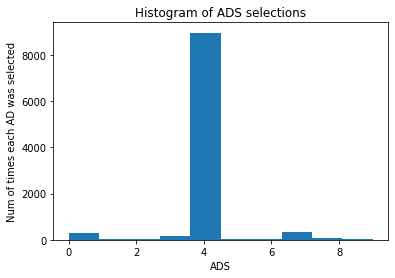

In [16]:
plt.hist(ads_selected)
plt.title('Histogram of ADS selections')
plt.xlabel('ADS')
plt.ylabel('Num of times each AD was selected')
plt.show()